<a href="https://colab.research.google.com/github/ram-shankar58/Anamoly-detector/blob/main/K%20Means%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


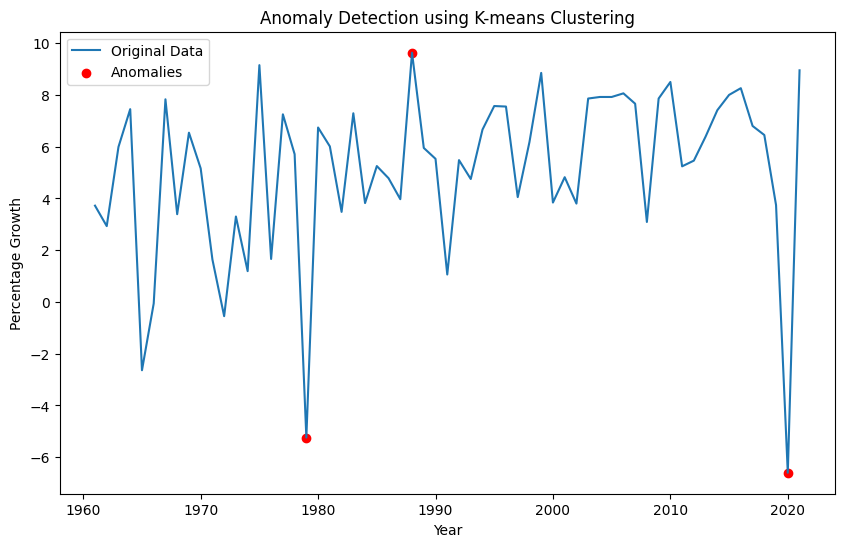

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read the data from the CSV file
data = pd.read_csv('/content/India_GDP_Data.csv')

# Convert the 'Year' column to datetime format
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Extract the Percentage_Growth data
growth_data = data['Percentage_Growth '].values.reshape(-1, 1)  # Update the column name for Percentage_Growth

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(growth_data)

# Get the cluster centers
centers = kmeans.cluster_centers_

# Calculate distances from cluster centers
distances = np.abs(growth_data - centers[kmeans.labels_])

# Define a threshold for anomaly detection
anomaly_threshold = np.percentile(distances, 95)  # Adjust the percentile for a different threshold

# Find the anomalies based on the threshold
anomalies = np.where(distances > anomaly_threshold)[0]

# Plot the original data set
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], growth_data, label='Original Data')

# Highlight the anomalies in a different color
plt.scatter(data['Year'].iloc[anomalies], growth_data[anomalies], color='red', label='Anomalies')

plt.xlabel('Year')
plt.ylabel('Percentage Growth')
plt.title('Anomaly Detection using K-means Clustering')
plt.legend()
plt.show()

